<a href="https://colab.research.google.com/github/iz-hiten/DAA_Practicals_23bcs14058/blob/main/Unpredictable_Efficiency_Exploring_Randomized_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic setup
import random, math, time, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm


In [2]:
def partition(arr, l, r):
    pivot = arr[r]
    i = l - 1
    for j in range(l, r):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[r] = arr[r], arr[i + 1]
    return i + 1

def randomized_quicksort(arr, l=0, r=None):
    if r is None: r = len(arr) - 1
    if l < r:
        pivot_index = random.randint(l, r)
        arr[pivot_index], arr[r] = arr[r], arr[pivot_index]
        p = partition(arr, l, r)
        randomized_quicksort(arr, l, p - 1)
        randomized_quicksort(arr, p + 1, r)
    return arr


In [3]:
def test_quicksort():
    sizes = [1000, 2000, 5000, 10000, 20000]
    trials = 5
    results = []

    for n in sizes:
        times = []
        for _ in range(trials):
            arr = np.random.randint(0, 100000, n).tolist()
            start = time.perf_counter()
            randomized_quicksort(arr)
            end = time.perf_counter()
            times.append(end - start)
        results.append((n, np.mean(times), np.std(times)))
    df = pd.DataFrame(results, columns=["Size", "AvgTime", "StdDev"])
    return df

qs_df = test_quicksort()
qs_df


,Size,AvgTime,StdDev
0,1000,0.001576,0.000071
1,2000,0.003983,0.000951
2,5000,0.009231,0.000239
3,10000,0.019874,0.000954
4,20000,0.048846,0.006106


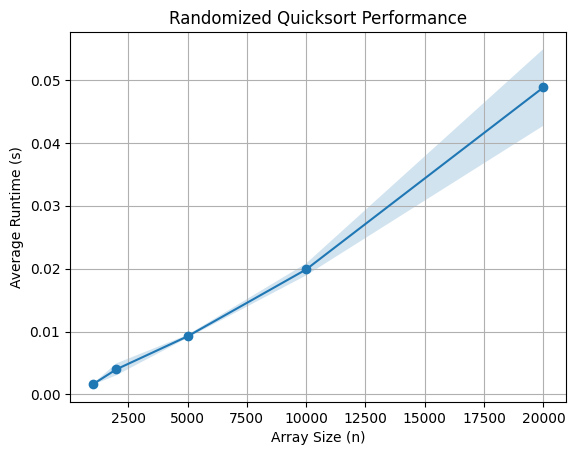

In [4]:
plt.plot(qs_df["Size"], qs_df["AvgTime"], marker='o')
plt.fill_between(qs_df["Size"],
                 qs_df["AvgTime"] - qs_df["StdDev"],
                 qs_df["AvgTime"] + qs_df["StdDev"], alpha=0.2)
plt.xlabel("Array Size (n)")
plt.ylabel("Average Runtime (s)")
plt.title("Randomized Quicksort Performance")
plt.grid(True)
plt.show()


In [5]:
def quickselect(arr, k):
    if not arr:
        return None
    pivot = random.choice(arr)
    lows = [x for x in arr if x < pivot]
    highs = [x for x in arr if x > pivot]
    pivots = [x for x in arr if x == pivot]
    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivot
    else:
        return quickselect(highs, k - len(lows) - len(pivots))


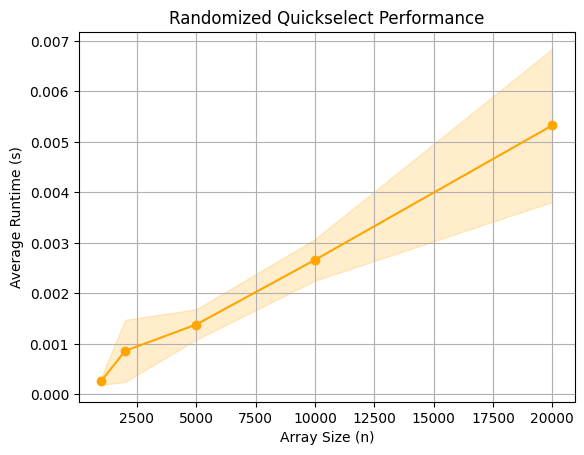

In [6]:
def test_quickselect():
    sizes = [1000, 2000, 5000, 10000, 20000]
    trials = 5
    results = []

    for n in sizes:
        times = []
        for _ in range(trials):
            arr = np.random.randint(0, 100000, n).tolist()
            k = n // 2
            start = time.perf_counter()
            quickselect(arr, k)
            end = time.perf_counter()
            times.append(end - start)
        results.append((n, np.mean(times), np.std(times)))
    df = pd.DataFrame(results, columns=["Size", "AvgTime", "StdDev"])
    return df

qs2_df = test_quickselect()
plt.plot(qs2_df["Size"], qs2_df["AvgTime"], marker='o', color='orange')
plt.fill_between(qs2_df["Size"], qs2_df["AvgTime"] - qs2_df["StdDev"], qs2_df["AvgTime"] + qs2_df["StdDev"], alpha=0.2, color='orange')
plt.xlabel("Array Size (n)")
plt.ylabel("Average Runtime (s)")
plt.title("Randomized Quickselect Performance")
plt.grid(True)
plt.show()


In [7]:
def mc_pi(n_samples):
    count = 0
    for _ in range(n_samples):
        x, y = random.random(), random.random()
        if x*x + y*y <= 1.0:
            count += 1
    return 4.0 * count / n_samples


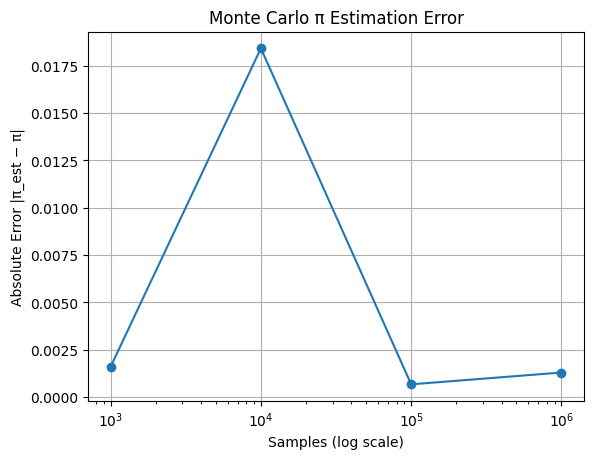

In [8]:
samples = [1000, 10000, 100000, 1000000]
estimates, errors = [], []

for n in samples:
    est = mc_pi(n)
    estimates.append(est)
    errors.append(abs(est - math.pi))

plt.plot(samples, errors, marker='o')
plt.xscale('log')
plt.xlabel("Samples (log scale)")
plt.ylabel("Absolute Error |π_est − π|")
plt.title("Monte Carlo π Estimation Error")
plt.grid(True)
plt.show()


In [9]:
def karger_min_cut(graph):
    g = copy.deepcopy(graph)
    while len(g) > 2:
        u = random.choice(list(g.keys()))
        v = random.choice(g[u])
        g[u].extend(g[v])
        for w in g[v]:
            g[w] = [u if x == v else x for x in g[w]]
        del g[v]
        g[u] = [x for x in g[u] if x != u]
    remaining = list(g.items())
    return len(remaining[0][1])


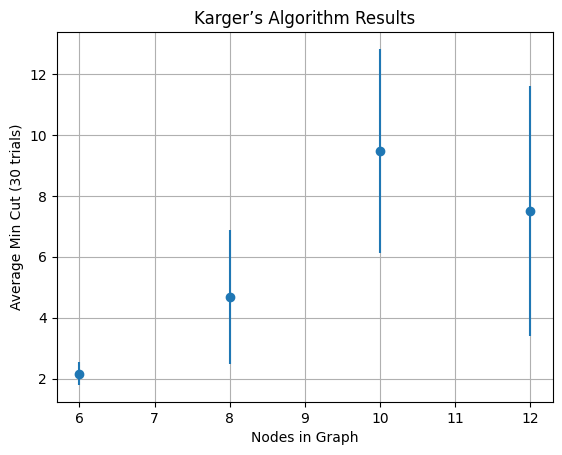

In [10]:
def random_graph(n, p):
    G = nx.erdos_renyi_graph(n, p)
    g_dict = {node: list(G.neighbors(node)) for node in G.nodes()}
    return g_dict

def test_karger():
    sizes = [6, 8, 10, 12]
    results = []
    for n in sizes:
        g = random_graph(n, 0.5)
        cuts = [karger_min_cut(g) for _ in range(30)]
        results.append((n, np.mean(cuts), np.std(cuts)))
    df = pd.DataFrame(results, columns=["Nodes", "AvgCut", "StdDev"])
    return df

kg_df = test_karger()
plt.errorbar(kg_df["Nodes"], kg_df["AvgCut"], yerr=kg_df["StdDev"], fmt='o')
plt.xlabel("Nodes in Graph")
plt.ylabel("Average Min Cut (30 trials)")
plt.title("Karger’s Algorithm Results")
plt.grid(True)
plt.show()


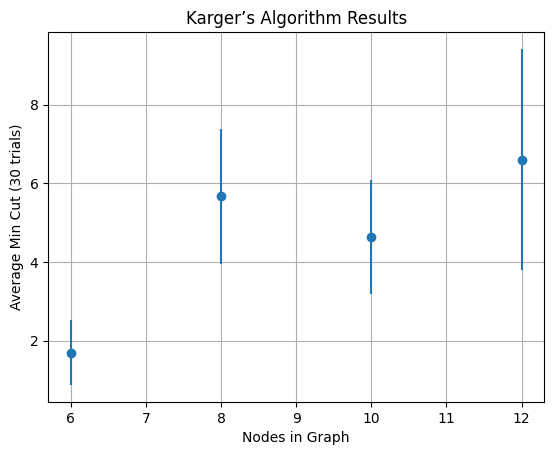

In [11]:
def random_graph(n, p):
    G = nx.erdos_renyi_graph(n, p)
    g_dict = {node: list(G.neighbors(node)) for node in G.nodes()}
    return g_dict

def test_karger():
    sizes = [6, 8, 10, 12]
    results = []
    for n in sizes:
        g = random_graph(n, 0.5)
        cuts = [karger_min_cut(g) for _ in range(30)]
        results.append((n, np.mean(cuts), np.std(cuts)))
    df = pd.DataFrame(results, columns=["Nodes", "AvgCut", "StdDev"])
    return df

kg_df = test_karger()
plt.errorbar(kg_df["Nodes"], kg_df["AvgCut"], yerr=kg_df["StdDev"], fmt='o')
plt.xlabel("Nodes in Graph")
plt.ylabel("Average Min Cut (30 trials)")
plt.title("Karger’s Algorithm Results")
plt.grid(True)
plt.show()


In [13]:
import math

class BloomFilter:
    def __init__(self, n_items, p_fp):
        m = - (n_items * math.log(p_fp)) / (math.log(2)**2)
        self.m = int(m)
        self.k = int((self.m / n_items) * math.log(2))
        self.bits = [0] * self.m

    def _hashes(self, item):
        for i in range(self.k):
            yield (hash(str(item) + str(i)) % self.m)

    def add(self, item):
        for pos in self._hashes(item):
            self.bits[pos] = 1

    def __contains__(self, item):
        return all(self.bits[pos] for pos in self._hashes(item))


In [14]:
bf = BloomFilter(1000, 0.01)
data = [f"item{i}" for i in range(1000)]
for d in data:
    bf.add(d)

tests = 1000
fp = sum(1 for i in range(tests) if f"x{i}" in bf)
print("False positive rate:", fp / tests)


False positive rate: 0.005


In [15]:
print("Randomized Quicksort: average O(n log n), low variance, no bad cases.")
print("Quickselect: expected O(n), better practical performance than deterministic.")
print("Monte Carlo π: error ~ 1/sqrt(N). Randomness helps approximate efficiently.")
print("Karger’s Min-Cut: probabilistic success; repeat to increase confidence.")
print("Bloom Filter: saves memory at cost of small false positives.")


Randomized Quicksort: average O(n log n), low variance, no bad cases.
Quickselect: expected O(n), better practical performance than deterministic.
Monte Carlo π: error ~ 1/sqrt(N). Randomness helps approximate efficiently.
Karger’s Min-Cut: probabilistic success; repeat to increase confidence.
Bloom Filter: saves memory at cost of small false positives.
